Coeficiente de determinación

Para evitar comparar constantemente el modelo con la media, introduzcamos una nueva métrica. Esta se expresa en valores relativos, no en absolutos.

El coeficiente de determinación o la métrica R2 (R-squared) divide el  ECM del modelo entre el ECM de la media y luego resta el valor obtenido de uno. Si la métrica aumenta, la calidad del modelo también mejora.

R2 se calcula de la siguiente manera:

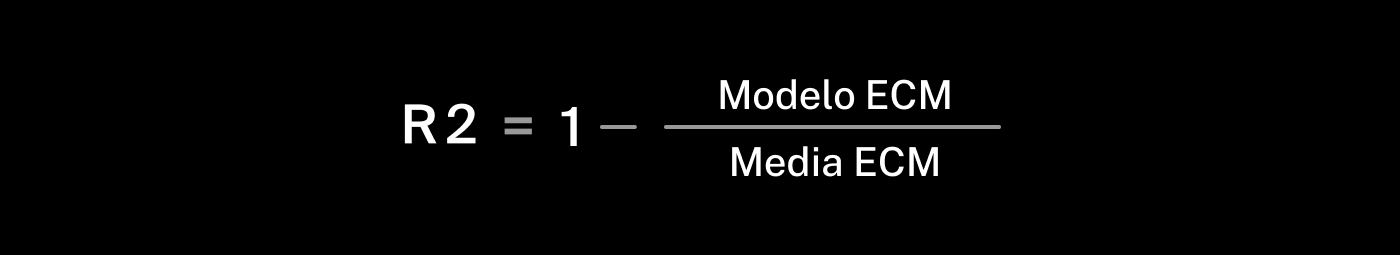

- R2 es igual a uno solo si el ECM del modelo es cero. Dicho modelo predeciría perfectamente todas las respuestas.
- R2 es cero: el modelo funciona tan bien como la media.
- Cuando R2 es negativo, peor que usar solo la media para predecir.
- R2 no puede tener valores mayores a uno porque esto indicaría que el modelo tiene un poder predictivo negativo, lo cual no es posible bajo la definición estándar de esta métrica.

Ejercicio

Calcula el valor R2 para la regresión lineal. Busca la función adecuada en la documentación de sklearn.metrics.  Impórtala.

Muestra el resultado (en precódigo).

La función se llama r2_score().

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score# < escribe el código aquí >

data = pd.read_csv('/datasets/flights_preprocessed.csv')

target = data['Arrival Delay']
features = data.drop(['Arrival Delay'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('R2 =', r2_score(target_valid, predicted_valid))

# R2 = 0.09710497146204988

Maximización de R2

R2 es más fácil de entender que la RECM. Quedémonos con R2 y escojamos el mejor modelo.

Crea un modelo con el valor R2 más alto posible. Para resolver el ejercicio necesitamos que sea al menos 0.14.

Aquí tienes algunas sugerencias:

1. Encuentra el R2 del modelo usando la función score(). Esta es la métrica predeterminada para los modelos de regresión en sklearn.

model = LinearRegression()

model.fit(features_train, target_train)

print(model.score(features_valid, target_valid))

0.09710497146204988

Elige la profundidad correcta del árbol. Comencemos con una pequeña cantidad de árboles. El número de árboles es proporcional a la calidad del modelo, pero también a la duración del entrenamiento, así que tenlo en mente.

for depth in range(1, 16, 1):

    model = RandomForestRegressor(n_estimators=20, 
    
    max_depth=depth, random_state=12345)

    model.fit(features_train, target_train)

    # < escribe el código aquí >

Luego inicia el entrenamiento de bosque aleatorio con una gran cantidad de árboles:

model = RandomForestRegressor(n_estimators=100, 
    max_depth=# < escribe el código aquí>, random_state=12345)

model.fit(features_train, target_train)

print(model.score(features_train, target_train))

print(model.score(features_valid, target_valid))

Entrenar un bosque de tal escala puede llevar unos minutos. En Jupyter Notebook, el tiempo de ejecución de la celda se mide con el comando %%time:

%%time

model = RandomForestRegressor(n_estimators=100, random_state=12345)

model.fit(features_train, target_train)

CPU times: user 48 s, sys: 928 ms, total: 48.9 s

Wall time: 54.9 s

El último texto Wall time se refiere al tiempo total transcurrido, medido como lo haría un reloj de pared, lo cual es lo que buscamos medir. 

Crea un modelo con un valor R2 de al menos 0.14. No escales las características. Usa estos datos: flights_preprocessed.csv

Divide los datos en un conjunto de entrenamiento y un conjunto de validación para elegir el mejor modelo.

Antes de enviar el modelo, asegúrate de haberlo entrenado en todo el conjunto de datos. Entrena un bosque aleatorio con profundidad = 11 y número de árboles = 100.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("/datasets/flights_preprocessed.csv")

target = data["Arrival Delay"]
features = data.drop(["Arrival Delay"], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = RandomForestRegressor(n_estimators=100, max_depth = 11, random_state=12345)# < escribe el código aquí >

model.fit(features_train, target_train)

print("Configuración del modelo actual lograda:")
print("Valor R2 en un conjunto de entrenamiento", model.score(features_train, target_train))
print("Valor R2 en un conjunto de validación:", model.score(features_valid, target_valid))

# Configuración del modelo actual lograda:
# Valor R2 en un conjunto de entrenamiento 0.3784551354930391
# Valor R2 en un conjunto de validación: 0.16447073084035702
